In [7]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from metrics import top_3_acc
from os import listdir
from PIL import Image, ImageFile
import pdb
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn import metrics
import pylab as pl


%matplotlib inline

In [15]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
DATASET_PATH = "/home/bartol/Projects/mozgalo-mb/src/data/test_annotated"
OUTPUT_PATH = "/home/bartol/Projects/mozgalo-mb/src/data/Other_pred"

In [3]:
from keras.models import model_from_json
json_file = open('../models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("../models/weights_ep12")
print("Loaded model from disk")

Loaded model from disk


In [4]:
## Ovo treba povuci kod treniranja => train_generator.class_indices
## i spremiti u model da ja mogu povuci kao custom varijablu iz modela

labels = {'HyVee': 8, 'Target': 19, 'CVSPharmacy': 2, 
          'Wegmans': 22, 'HEB': 6, 'StopShop': 18, 'BJs': 1, 
          'Albertsons': 0, 'FredMeyer': 4, 'Walgreens': 20, 
          'KingSoopers': 10, 'Walmart': 21, 'Safeway': 14, 
          'ShopRite': 16, 'Costco': 3, 'SamsClub': 15, 
          'WinCoFoods': 24, 'HarrisTeeter': 7, 'WholeFoodsMarket': 23,
          'Kroger': 11, 'Smiths': 17, 'Meijer': 12, 
          'Publix': 13, 'Frys': 5, 'JewelOsco': 9}

class_labels = {v: k for k, v in labels.items()}

In [40]:
# Class indices when OTher is present
labels = {'Albertsons': 0,
 'BJs': 1,
 'CVSPharmacy': 2,
 'Costco': 3,
 'FredMeyer': 4,
 'Frys': 5,
 'HEB': 6,
 'HarrisTeeter': 7,
 'HyVee': 8,
 'JewelOsco': 9,
 'KingSoopers': 10,
 'Kroger': 11,
 'Meijer': 12,
 'Other': 13,
 'Publix': 14,
 'Safeway': 15,
 'SamsClub': 16,
 'ShopRite': 17,
 'Smiths': 18,
 'StopShop': 19,
 'Target': 20,
 'Walgreens': 21,
 'Walmart': 22,
 'Wegmans': 23,
 'WholeFoodsMarket': 24,
 'WinCoFoods': 25}
class_labels = {v: k for k, v in labels.items()}

In [16]:
input_size = (229, 261)
batch_size = 32

def crop_upper_part(image, percent=0.4):
    height, _, _ = image.shape
    point = int(percent * height)
    return image[0:point,:]

def preprocess_image(image):
    img_array = img_to_array(image).astype(np.uint8)
    img_array = crop_upper_part(img_array, 0.4)
    return array_to_img(img_array)
    
datagen = ImageDataGenerator(preprocessing_function=preprocess_image,
                             samplewise_center=True,
                             samplewise_std_normalization=True)

gen_flow = datagen.flow_from_directory(
        DATASET_PATH, 
        target_size=input_size,
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False)

predict = model.predict_generator(gen_flow,
                                 max_queue_size=int(1.7 * 8),
                                 workers=8,
                                 verbose=1)

predicted_classes = np.argmax(predict, axis=1)

Found 10000 images belonging to 26 classes.
313/313 [==============================] - 106s 338ms/step


In [39]:
gen_flow.class_indices

{'Albertsons': 0,
 'BJs': 1,
 'CVSPharmacy': 2,
 'Costco': 3,
 'FredMeyer': 4,
 'Frys': 5,
 'HEB': 6,
 'HarrisTeeter': 7,
 'HyVee': 8,
 'JewelOsco': 9,
 'KingSoopers': 10,
 'Kroger': 11,
 'Meijer': 12,
 'Other': 13,
 'Publix': 14,
 'Safeway': 15,
 'SamsClub': 16,
 'ShopRite': 17,
 'Smiths': 18,
 'StopShop': 19,
 'Target': 20,
 'Walgreens': 21,
 'Walmart': 22,
 'Wegmans': 23,
 'WholeFoodsMarket': 24,
 'WinCoFoods': 25}

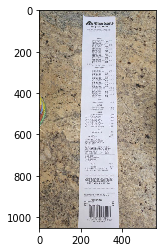

Filename: Albertsons/1021.jpg
Top 1 class: Albertsons conf: 0.83441883
Top 2 class: Safeway conf: 0.6075606
Top 3 class: Smiths conf: 1.4987379e-18


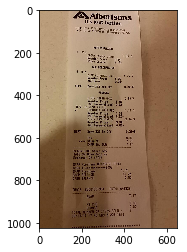

Filename: Albertsons/107.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 2.353827e-12
Top 3 class: Frys conf: 1.3582857e-14


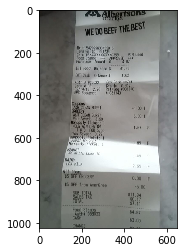

Filename: Albertsons/1084.jpg
Top 1 class: Albertsons conf: 0.7713888
Top 2 class: Walmart conf: 0.006407363
Top 3 class: Frys conf: 0.00036263137


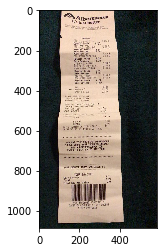

Filename: Albertsons/1107.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 3.3324105e-10
Top 3 class: Smiths conf: 1.4371539e-12


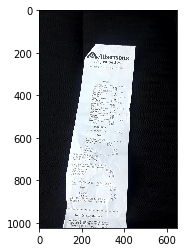

Filename: Albertsons/1123.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 1.5270671e-12
Top 3 class: Walmart conf: 7.869365e-14


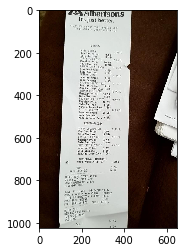

Filename: Albertsons/1186.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 1.7091262e-11
Top 3 class: FredMeyer conf: 1.0563354e-15


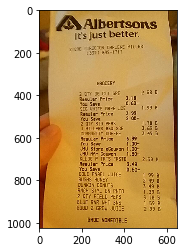

Filename: Albertsons/1194.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 6.2815245e-14
Top 3 class: Frys conf: 1.7142159e-15


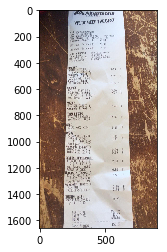

Filename: Albertsons/1343.jpg
Top 1 class: Albertsons conf: 0.16757657
Top 2 class: JewelOsco conf: 0.0007954847
Top 3 class: HyVee conf: 0.0003811887


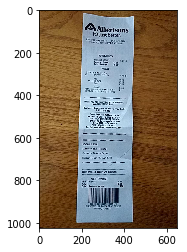

Filename: Albertsons/1375.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 9.0678203e-13
Top 3 class: FredMeyer conf: 2.173005e-16


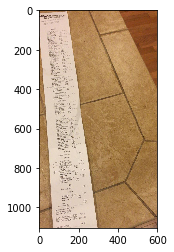

Filename: Albertsons/1454.jpg
Top 1 class: Safeway conf: 0.97519547
Top 2 class: Albertsons conf: 0.007696087
Top 3 class: Kroger conf: 1.2786218e-05


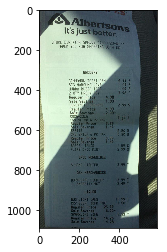

Filename: Albertsons/1457.jpg
Top 1 class: Albertsons conf: 0.9999435
Top 2 class: Safeway conf: 8.45488e-09
Top 3 class: Walmart conf: 1.0975911e-09


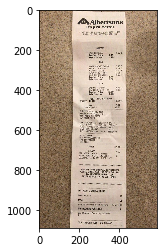

Filename: Albertsons/1466.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 3.9201854e-14
Top 3 class: CVSPharmacy conf: 3.7486833e-20


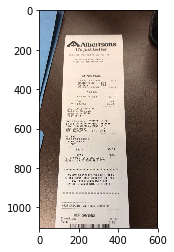

Filename: Albertsons/1470.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: FredMeyer conf: 2.626149e-12
Top 3 class: Safeway conf: 8.523045e-13


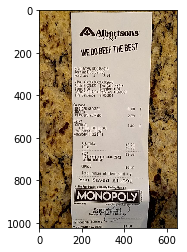

Filename: Albertsons/1482.jpg
Top 1 class: Albertsons conf: 0.9999926
Top 2 class: Walmart conf: 5.792427e-12
Top 3 class: Frys conf: 2.1540877e-17


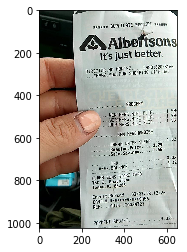

Filename: Albertsons/1558.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Frys conf: 5.7914855e-13
Top 3 class: Safeway conf: 8.290236e-14


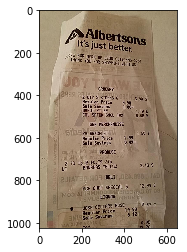

Filename: Albertsons/1577.jpg
Top 1 class: Albertsons conf: 0.9999999
Top 2 class: Safeway conf: 3.032396e-13
Top 3 class: Frys conf: 2.0039742e-13


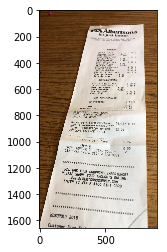

Filename: Albertsons/1652.jpg
Top 1 class: Albertsons conf: 0.99972945
Top 2 class: Safeway conf: 0.00016612095
Top 3 class: FredMeyer conf: 1.31051e-11


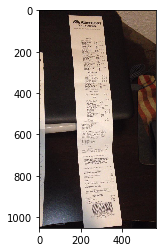

Filename: Albertsons/172.jpg
Top 1 class: Albertsons conf: 0.9989869
Top 2 class: Safeway conf: 0.00014856525
Top 3 class: Smiths conf: 5.691443e-08


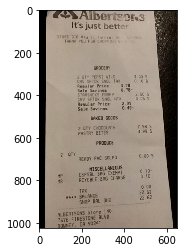

Filename: Albertsons/1736.jpg
Top 1 class: Albertsons conf: 0.9999863
Top 2 class: Safeway conf: 2.4415394e-07
Top 3 class: Walmart conf: 1.9869445e-11


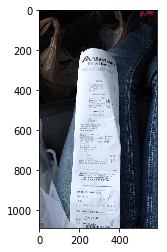

Filename: Albertsons/1782.jpg
Top 1 class: Albertsons conf: 0.9999988
Top 2 class: Safeway conf: 6.587849e-08
Top 3 class: CVSPharmacy conf: 8.183482e-11


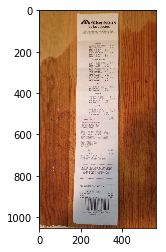

Filename: Albertsons/1877.jpg
Top 1 class: Albertsons conf: 0.9999987
Top 2 class: Safeway conf: 1.4308387e-08
Top 3 class: Target conf: 7.449254e-15


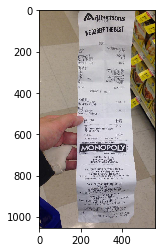

Filename: Albertsons/1889.jpg
Top 1 class: Albertsons conf: 0.42705408
Top 2 class: WinCoFoods conf: 0.00048696855
Top 3 class: WholeFoodsMarket conf: 2.2750866e-05


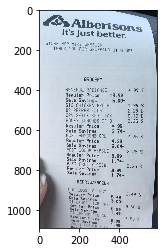

Filename: Albertsons/192.jpg
Top 1 class: Albertsons conf: 0.9999999
Top 2 class: Safeway conf: 3.829123e-12
Top 3 class: Frys conf: 2.2550194e-14


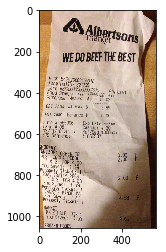

Filename: Albertsons/1936.jpg
Top 1 class: Albertsons conf: 0.9999939
Top 2 class: Frys conf: 2.0354898e-09
Top 3 class: FredMeyer conf: 1.7646556e-10


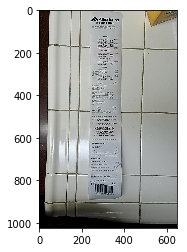

Filename: Albertsons/1955.jpg
Top 1 class: Albertsons conf: 0.99698406
Top 2 class: Safeway conf: 0.00028909306
Top 3 class: Walmart conf: 0.0001386844


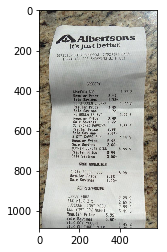

Filename: Albertsons/2067.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 2.3172389e-14
Top 3 class: Frys conf: 2.0747233e-15


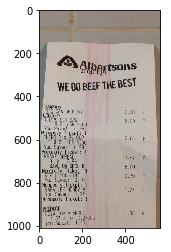

Filename: Albertsons/2143.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Frys conf: 9.308718e-11
Top 3 class: Smiths conf: 5.522009e-12


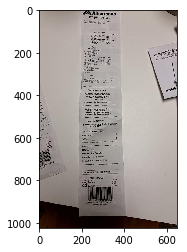

Filename: Albertsons/2229.jpg
Top 1 class: Albertsons conf: 0.999843
Top 2 class: Safeway conf: 5.232392e-05
Top 3 class: WholeFoodsMarket conf: 6.6652504e-08


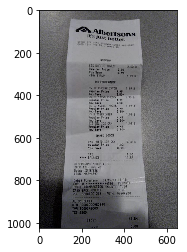

Filename: Albertsons/2248.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 1.1450939e-15
Top 3 class: CVSPharmacy conf: 3.3309608e-18


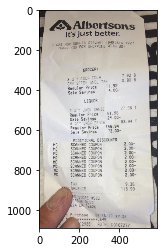

Filename: Albertsons/2250.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 4.914466e-13
Top 3 class: Frys conf: 5.3996134e-18


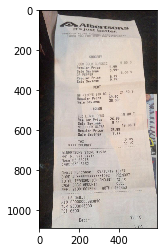

Filename: Albertsons/2288.jpg
Top 1 class: Albertsons conf: 0.99999607
Top 2 class: Safeway conf: 1.5889805e-08
Top 3 class: Frys conf: 1.6048315e-11


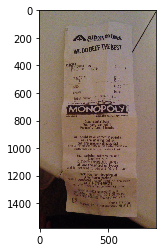

Filename: Albertsons/2313.jpg
Top 1 class: Albertsons conf: 0.99985623
Top 2 class: Publix conf: 1.4029318e-06
Top 3 class: Frys conf: 4.987654e-07


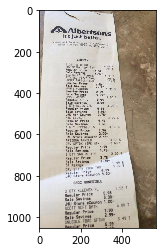

Filename: Albertsons/2354.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 2.0496813e-14
Top 3 class: Frys conf: 1.69449e-15


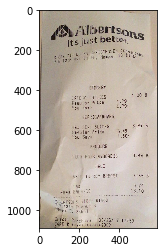

Filename: Albertsons/2355.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 9.664822e-13
Top 3 class: Frys conf: 7.6238095e-16


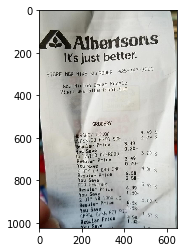

Filename: Albertsons/2382.jpg
Top 1 class: Albertsons conf: 0.99999535
Top 2 class: Walmart conf: 2.6783593e-12
Top 3 class: Wegmans conf: 1.3401423e-12


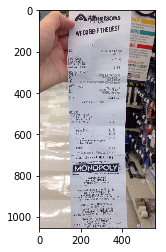

Filename: Albertsons/2454.jpg
Top 1 class: Albertsons conf: 0.0017821285
Top 2 class: WinCoFoods conf: 0.0003744037
Top 3 class: Walmart conf: 1.041104e-05


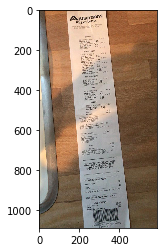

Filename: Albertsons/2467.jpg
Top 1 class: Albertsons conf: 0.99994123
Top 2 class: Safeway conf: 2.035569e-05
Top 3 class: Target conf: 1.2139014e-16


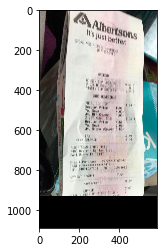

Filename: Albertsons/2500.jpg
Top 1 class: Albertsons conf: 0.9999995
Top 2 class: Safeway conf: 1.7850008e-10
Top 3 class: Frys conf: 1.582956e-10


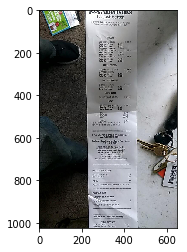

Filename: Albertsons/2534.jpg
Top 1 class: Albertsons conf: 0.9999999
Top 2 class: Safeway conf: 1.1817125e-09
Top 3 class: Walmart conf: 2.6246971e-12


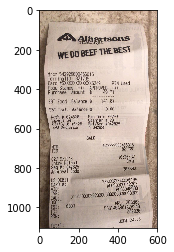

Filename: Albertsons/2571.jpg
Top 1 class: Albertsons conf: 0.9970753
Top 2 class: Frys conf: 3.6438132e-06
Top 3 class: Publix conf: 2.186547e-08


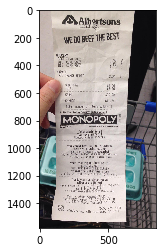

Filename: Albertsons/2591.jpg
Top 1 class: Albertsons conf: 0.9462554
Top 2 class: Publix conf: 3.7258463e-08
Top 3 class: Frys conf: 6.271753e-11


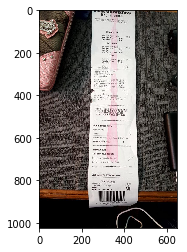

Filename: Albertsons/2603.jpg
Top 1 class: Albertsons conf: 0.99596906
Top 2 class: Safeway conf: 0.0018518964
Top 3 class: Smiths conf: 1.0459837e-12


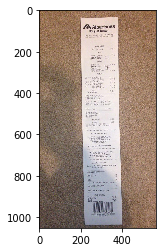

Filename: Albertsons/269.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 1.1868039e-09
Top 3 class: FredMeyer conf: 1.1770204e-16


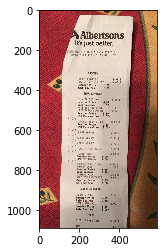

Filename: Albertsons/2719.jpg
Top 1 class: Albertsons conf: 0.999979
Top 2 class: Safeway conf: 7.3944307e-07
Top 3 class: Wegmans conf: 1.14337914e-10


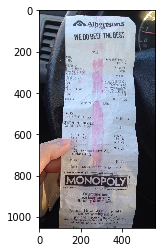

Filename: Albertsons/278.jpg
Top 1 class: Albertsons conf: 0.9808545
Top 2 class: FredMeyer conf: 0.00013520572
Top 3 class: Frys conf: 5.0238254e-05


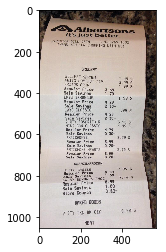

Filename: Albertsons/2858.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 7.399335e-12
Top 3 class: Frys conf: 2.2375175e-14


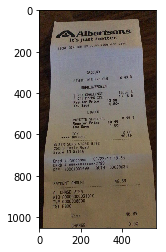

Filename: Albertsons/287.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 7.773279e-14
Top 3 class: Frys conf: 2.5861936e-16


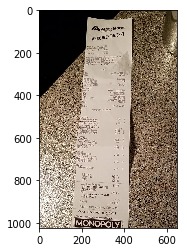

Filename: Albertsons/2877.jpg
Top 1 class: Albertsons conf: 0.9984126
Top 2 class: Walmart conf: 4.99177e-06
Top 3 class: WholeFoodsMarket conf: 4.614323e-06


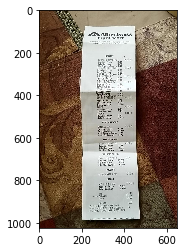

Filename: Albertsons/2880.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Safeway conf: 8.439488e-14
Top 3 class: FredMeyer conf: 2.7753403e-18


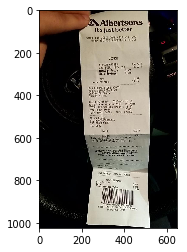

Filename: Albertsons/2893.jpg
Top 1 class: Albertsons conf: 0.9999993
Top 2 class: Safeway conf: 5.748375e-10
Top 3 class: Walmart conf: 1.8805839e-11


In [38]:
plt.figure()
for i in range(50):
    img = Image.open(os.path.join(DATASET_PATH, gen_flow.filenames[i]))
    plt.imshow(img)
    plt.show()
    top3 = list(reversed(sorted(predict[i])[-3:]))
    top3_arg = np.argsort(predict[i])[-3:]
    print("Filename:", gen_flow.filenames[i])
    for j, class_indice in enumerate(reversed(top3_arg)):
        print("Top", (j+1), "class:", class_labels[class_indice], "conf:", top3[j])

In [33]:
def get_class(index):
    top3 = np.array(sorted(predict[index])[::-1])
    top3_arg = np.argsort(predict[index])[::-1]
    if np.all(top3 < 0.995) or top3[1] > 1e-9:
        out = "Other"
    else:
        out = class_labels[top3_arg[0]]
    return out

In [13]:
len(gen_flow)

282

In [76]:
# Prediction with an unknown class
thresholds = mean - dev*20

predicted_classes = []
for i, act in enumerate(predict):
    sorted_pred = sorted(act)[::-1]
    if sorted_pred[0] < 0.95 or (sorted_pred[1] > 1e-6):
        
        predicted_classes.append(13)
    else:
        if np.argmax(act) >= 13:
             predicted_classes.append(np.argmax(act) +1 )
        else:
            predicted_classes.append(np.argmax(act))

In [42]:
# Generate ground truth indices
gen_flow.reset()
ground_truth = []
for i, (batch_x, batch_y) in enumerate(gen_flow):
    ground_truth.extend(np.argmax(batch_y, 1))
    if i % 20 == 0:
        print(i)
    if i == len(gen_flow) - 1:
        break

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300


In [24]:
len(predicted_classes)

10000

In [77]:
print(metrics.classification_report(ground_truth, predicted_classes))

             precision    recall  f1-score   support

          0       1.00      0.68      0.81       200
          1       1.00      0.99      0.99       200
          2       0.99      0.97      0.98       200
          3       0.99      0.97      0.98       200
          4       0.83      0.96      0.89       198
          5       1.00      0.94      0.97       202
          6       1.00      0.98      0.99       200
          7       0.99      0.77      0.86       200
          8       0.98      0.95      0.97       198
          9       0.55      0.95      0.70       201
         10       0.98      0.65      0.78       198
         11       0.81      0.81      0.81       200
         12       1.00      0.84      0.92       200
         13       0.89      0.92      0.91      5009
         14       0.99      0.80      0.89       198
         15       0.99      0.83      0.90       198
         16       1.00      0.94      0.97       200
         17       0.99      0.94      0.97   

In [10]:
def calc_thresholds(predictions, truth):
    """
    :param predictions: Numpy array of sigmoid activations from the model
    """
    activations = [[] for _ in range(len(predictions[0]))]
    predicted = np.argmax(predictions, axis=1)
    
    # Get only the correct predictions
    correct = predictions[predicted == truth]
    for act in correct:
        pred = np.argmax(act)
        activations[pred].append(np.max(act))
    means = np.array([np.mean(act) for act in activations])
    sds = np.array([np.std(act) for act in activations])
    return means, sds, activations

In [11]:
mean, dev, act = calc_thresholds(predict, ground_truth)
for i, sd in enumerate(dev):
    print(class_labels[i],  "THR:" ,mean[i] - 3*sd)

Albertsons THR: 0.9999907459152837
BJs THR: 0.9999995534510475
CVSPharmacy THR: 0.9999993957971469
Costco THR: 0.9999872660200708
FredMeyer THR: 0.9999999631624563
Frys THR: 0.9999911698660071
HEB THR: 0.999999981773597
HarrisTeeter THR: 0.9999907908832029
HyVee THR: 0.9999487352415599
JewelOsco THR: 0.9997683238034369
KingSoopers THR: 0.9999998967617287
Kroger THR: 0.9999995804554516
Meijer THR: 0.9999991176940171
Publix THR: 0.9822644563391805
Safeway THR: 0.9999941083704016
SamsClub THR: 0.9999240543238557
ShopRite THR: 0.9999865299291741
Smiths THR: 0.9999996865587164
StopShop THR: 0.9946441180072725
Target THR: 0.9662159532308578
Walgreens THR: 0.9998647430220444
Walmart THR: 0.9999996605173394
Wegmans THR: 0.999999907039065
WholeFoodsMarket THR: 0.9999996913972566
WinCoFoods THR: 0.9999460728213307


In [20]:
# Save the Other class only
thresholds = mean - dev*3

for i, act in enumerate(predict):
    sorted_pred = sorted(predict)[::-1]
    if np.all(act < 0.9):
        filename = gen_flow.filenames[i].split("/")[1]
        img = Image.open(os.path.join(DATASET_PATH, gen_flow.filenames[i]))
        # Example is considered as Other
        path = os.path.join(OUTPUT_PATH, "Other")
        path = os.path.join(path, filename)
        img.save(path)

KeyboardInterrupt: 

In [34]:
for i, pred in enumerate(predict):
    img = Image.open(os.path.join(DATASET_PATH, gen_flow.filenames[i]))
    filename = gen_flow.filenames[i].split("/")[1]
    img_class = get_class(i)
    path = os.path.join(OUTPUT_PATH, img_class)
    path = os.path.join(path, filename)
    img.save(path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/bartol/Projects/mozgalo-mb/src/data/Other_pred/Albertsons/107.jpg'

In [36]:
data = {}
for i, predicted in enumerate(predicted_classes):
    img_class = get_class(i)
    filename = int(gen_flow.filenames[i].split("/")[1].split(".")[0])
    data[filename] = img_class

print(data)
lines = []
for i in range(10000):
    lines.append(data[i])
print(lines)

{0: 'Smiths', 1: 'Target', 2: 'Other', 3: 'Other', 4: 'ShopRite', 5: 'Walgreens', 6: 'HarrisTeeter', 7: 'Other', 8: 'Safeway', 9: 'Smiths', 10: 'SamsClub', 11: 'Other', 12: 'Other', 13: 'Other', 14: 'Other', 15: 'Other', 16: 'KingSoopers', 17: 'Other', 18: 'Other', 19: 'Other', 20: 'Other', 21: 'Other', 22: 'CVSPharmacy', 23: 'Other', 24: 'Other', 25: 'Other', 26: 'CVSPharmacy', 27: 'Other', 28: 'Safeway', 29: 'Other', 30: 'Other', 31: 'Meijer', 32: 'Other', 33: 'Other', 34: 'CVSPharmacy', 35: 'ShopRite', 36: 'Other', 37: 'Meijer', 38: 'Other', 39: 'Other', 40: 'Walmart', 41: 'Kroger', 42: 'StopShop', 43: 'Other', 44: 'Other', 45: 'Safeway', 46: 'Other', 47: 'Other', 48: 'Other', 49: 'Safeway', 50: 'Other', 51: 'Other', 52: 'Other', 53: 'Walgreens', 54: 'Other', 55: 'Walmart', 56: 'Other', 57: 'Other', 58: 'Other', 59: 'Other', 60: 'ShopRite', 61: 'Smiths', 62: 'Other', 63: 'Other', 64: 'Target', 65: 'HarrisTeeter', 66: 'Other', 67: 'FredMeyer', 68: 'Other', 69: 'Walmart', 70: 'Frys', 

In [37]:
with open('output.csv','w') as file:
    for i, line in enumerate(lines):
        file.write(line)
        if i != len(lines) - 1:
            file.write('\n')